In [19]:
# @title Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# @title Monthly Dividends
data1 = pd.read_csv('/Users/bhargavajulaganti/Documents/dev/PredictivePathways/Dividends&Expenses/Dividends.csv')

# Create DataFrames
df1 = pd.DataFrame(data1)

In [21]:
# @title View Monthly Dividends
df1.head(14)

,Stock,January,February,March,April,May,June,July,August,September,October,November,December
0,JEPQ,3.61,3.41,3.83,4.33,4.51,6.40,17.77,16.56,22.68,NaN,NaN,NaN
1,JEPI,28.85,20.43,20.55,23.71,17.34,19.27,6.04,15.67,21.76,NaN,NaN,NaN
2,SPYI,16.15,16.56,16.88,16.64,17.16,17.53,20.32,22.68,21.85,NaN,NaN,NaN
3,SCHD,NaN,NaN,3.03,NaN,NaN,NaN,4.11,NaN,NaN,NaN,NaN,NaN
4,MPW,37.97,NaN,NaN,NaN,37.97,NaN,37.97,NaN,NaN,20.25,NaN,NaN
5,PFE,NaN,NaN,42.00,NaN,NaN,42.00,NaN,NaN,42.00,NaN,NaN,NaN
6,MSFT,NaN,NaN,3.00,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN
7,APPL,NaN,0.49,NaN,NaN,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,VOO,NaN,NaN,1.58,NaN,NaN,NaN,2.47,NaN,NaN,NaN,NaN,NaN
9,SPY,0.07,NaN,NaN,1.43,NaN,NaN,1.77,NaN,NaN,NaN,NaN,NaN


In [22]:
# @title Monthly Expenses
data2 = pd.read_csv('/Users/bhargavajulaganti/Documents/dev/PredictivePathways/Dividends&Expenses/MonthlyExpenses.csv')
# Create DataFrames
df2 = pd.DataFrame(data2)

In [23]:
# @title View Monthly Expenses
df2.head(14)

,Type,January,February,March,April,May,June,July,August,September,October,November,December
0,DTE,108.0,127.30,53.79,135.92,126.75,171.53,195.76,197.31,163.85,NaN,NaN,NaN
1,ConsumersEnergy,128.3,151.46,133.52,120.53,72.29,50.75,47.43,24.81,21.73,NaN,NaN,NaN
2,Internet,30.0,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,NaN,NaN,NaN
3,Mobile,40.0,40.00,40.00,40.00,40.00,20.00,20.00,20.00,20.00,NaN,NaN,NaN
4,WaterBill,NaN,144.75,NaN,NaN,119.75,NaN,NaN,178.00,NaN,NaN,NaN,NaN
5,AmazonPrime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       6 non-null      object 
 1   January    4 non-null      float64
 2   February   5 non-null      float64
 3   March      4 non-null      float64
 4   April      4 non-null      float64
 5   May        5 non-null      float64
 6   June       4 non-null      float64
 7   July       4 non-null      float64
 8   August     5 non-null      float64
 9   September  4 non-null      float64
 10  October    0 non-null      float64
 11  November   0 non-null      float64
 12  December   0 non-null      float64
dtypes: float64(12), object(1)
memory usage: 756.0+ bytes


In [25]:
# @title Calculate Monthly expenses and Dividends Totals
monthly_dividend_totals = df1.sum(axis=0, skipna=True)
monthly_expenses_totals = df2.sum(axis=0, skipna=True)

In [26]:
# @title Convert the totals to numeric values
monthly_dividend_totals_tonumeric = pd.to_numeric(monthly_dividend_totals, errors='coerce')
monthly_expenses_totals_tonumeric = pd.to_numeric(monthly_expenses_totals, errors='coerce')
# print(monthly_dividend_totals_tonumeric)
# print(monthly_expenses_totals_tonumeric)

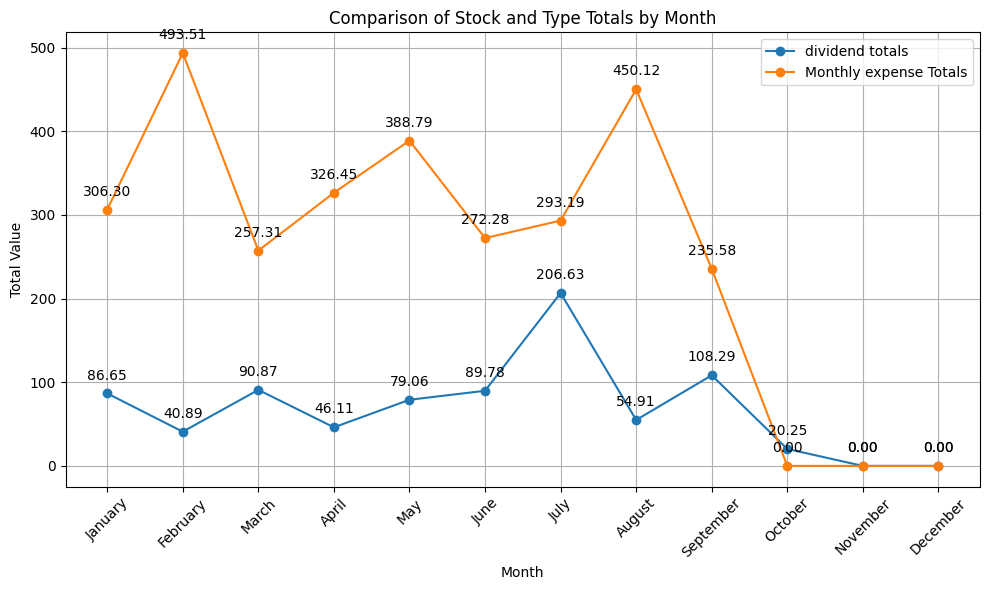

In [27]:
# @title Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_dividend_totals_tonumeric.index, monthly_dividend_totals_tonumeric.values, label='dividend totals', marker='o')
plt.plot(monthly_expenses_totals_tonumeric.index, monthly_expenses_totals_tonumeric.values, label='Monthly expense Totals', marker='o')

# Add annotations
for i, value in enumerate(monthly_dividend_totals_tonumeric.values):
    plt.annotate(f'{value:.2f}', (monthly_dividend_totals_tonumeric.index[i], monthly_dividend_totals_tonumeric.values[i]), textcoords="offset points", xytext=(0,10), ha='center')

for i, value in enumerate(monthly_expenses_totals_tonumeric.values):
    plt.annotate(f'{value:.2f}', (monthly_expenses_totals_tonumeric.index[i], monthly_expenses_totals_tonumeric.values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Value')
plt.title('Comparison of Stock and Type Totals by Month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()